In [1]:
import os
import sys
import itertools

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.regression.linear_model as sm
from scipy import io
from mpl_toolkits.axes_grid1 import make_axes_locatable

path_root = os.environ.get('DECIDENET_PATH')
path_code = os.path.join(path_root, 'code')
if path_code not in sys.path:
    sys.path.append(path_code)
from dn_utils.behavioral_models import load_behavioral_data

%matplotlib inline

In [2]:
# Directory for PPI analysis
path_out = os.path.join(path_root, 'data/main_fmri_study/derivatives/ppi')
path_timeries = os.path.join(path_out, 'timeseries')

# Load behavioral data
path_beh = os.path.join(path_root, 'data/main_fmri_study/sourcedata/behavioral')
beh, meta = load_behavioral_data(path=path_beh, verbose=False)
n_subjects, n_conditions, n_trials, _ = beh.shape

# Load neural & BOLD timeseries
data = io.loadmat(os.path.join(
    path_timeries, 
    'timeseries_pipeline-24HMPCSFWM_atlas-metaROI_neural.mat'))
timeseries_neural_aggregated = data['timeseries_neural_aggregated']
timeseries_denoised_aggregated = np.load(os.path.join(
    path_timeries, 
    'timeseries_pipeline-24HMPCSFWM_atlas-metaROI_bold.npy'))
downsamples = data['k'].flatten()

# Acquisition parameters
_, _, n_volumes, n_rois = timeseries_denoised_aggregated.shape

# Input data shape
print('timeseries_neural_aggregated.shape', timeseries_neural_aggregated.shape)
print('timeseries_denoised_aggregated.shape', timeseries_denoised_aggregated.shape)

timeseries_neural_aggregated.shape (32, 2, 11680, 30)
timeseries_denoised_aggregated.shape (32, 2, 730, 30)


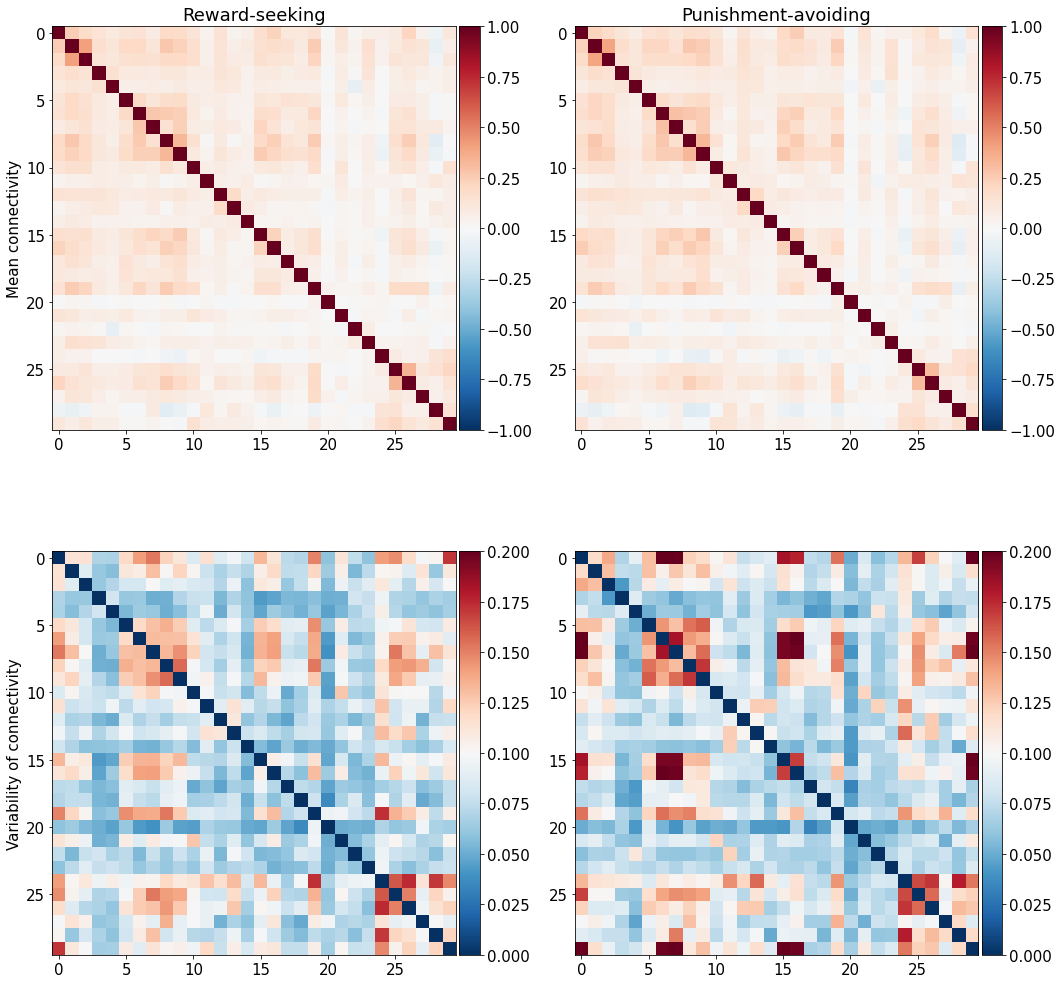

In [3]:
mpl.rcParams.update({"font.size": 15})

fc_rest = np.zeros((n_subjects, n_conditions, n_rois, n_rois))
for i in range(n_subjects):
    for j in range(n_conditions):
        fc_rest[i, j] = np.corrcoef(timeseries_denoised_aggregated[i, j].T)
    

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

im = [[None, None], [None, None]]
im[0][0] = ax[0][0].imshow(fc_rest[:, 0, :, :].mean(axis=0), clim=[-1, 1], cmap='RdBu_r')
im[0][1] = ax[0][1].imshow(fc_rest[:, 1, :, :].mean(axis=0), clim=[-1, 1], cmap='RdBu_r')
im[1][0] = ax[1][0].imshow(fc_rest[:, 0, :, :].std(axis=0), clim=[0, .2], cmap='RdBu_r')
im[1][1] = ax[1][1].imshow(fc_rest[:, 1, :, :].std(axis=0), clim=[0, .2], cmap='RdBu_r')

for i, j in itertools.product([0, 1], repeat=2):
    divider = make_axes_locatable(ax[i][j])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im[i][j], cax=cax)
    
ax[0][0].set_title("Reward-seeking")
ax[0][1].set_title("Punishment-avoiding")
ax[0][0].set_ylabel("Mean connectivity")
ax[1][0].set_ylabel("Variability of connectivity")

plt.tight_layout()